# Pipework dataset preparing
- Download the dataset
- Sample a test set, generate some meta files (file_list.txt, shape_names.txt, train.txt, test.txt) **following ModelNet40 naming convention**.
- Synthesize info, e.g., count_of_each_shape, etc.
- visualize instances of the dataset using Open3D, PyntCloud and matplotlib

## Download the data
The [PipeWork](https://www.dhmun.net/home/Research_Data) dataset is from [Prof. Duhwan Mun](https://www.dhmun.net/) group. There are 4647 (in fact there are only **4644** instances, lack 3 files) point clouds from 17 pipework categories in the dataset.

In [1]:
# cd to a desired directory
# !cd ~/yinchao/datasets/PipeWork

# download and unzip
# wget  --no-check-certificate -r 'https://drive.google.com/u/0/uc?id=1CtWhJVi-Sycul312dGTrKigyUyw8YPO7&export=download' -O 'PipeWork.zip'
# !bash scripts/download-PipeWork.sh
# !unzip PipeWork.zip -d PipeWork-original

## Creat a test set and generate meta files

In [2]:
import os
import random
import glob
import numpy as np

# set seeds
random.seed(123)
np.random.seed(123)
    
# follow ModelNet40 naming
file_all='file_list.txt'
file_shape_names='shape_names.txt'
file_train='train.txt'
file_test='test.txt'

In [3]:
def write_list_to_txt(items,file_name='file_list.txt'):
    with open(os.path.join(data_root, file_name), 'w') as f:
        for item in items:
            f.write(item.strip()+'\n')

In [4]:
data_root='./PipeWork-original'

cloud_names_raw=glob.glob(os.path.join(data_root,'**/*.xyz'),recursive=True)
print(len(cloud_names_raw)) # note: here include the backup files
print(cloud_names_raw[:3])

5802
['./PipeWork-original/Flange/Flange_3_2.xyz', './PipeWork-original/Flange/Flange_38_3.xyz', './PipeWork-original/Flange/Flange_106_3.xyz']


In [5]:
# create file_list.txt
cloud_names = ['/'.join(cloud_name.split('/')[2:]) for cloud_name in cloud_names_raw]
write_list_to_txt(cloud_names, file_all)

In [6]:
# create shape_names.txt
shape_names=[sub_folder for sub_folder in os.listdir(data_root) 
                 if os.path.isdir(os.path.join(data_root,sub_folder)) and (not sub_folder.startswith('.'))]
# sort the names for alphabetic output 
shape_names.sort()
print(shape_names)
write_list_to_txt(shape_names,file_shape_names)

['BlindFlange', 'Cross', 'Elbow 90', 'Elbow non 90', 'Flange', 'Flange WN', 'Olet', 'OrificeFlange', 'Pipe', 'Reducer CONC', 'Reducer ECC', 'Reducer Insert', 'Safety Valve', 'Strainer', 'Tee', 'Tee RED', 'Valve']


In [7]:
# create {train,test}.txt
split_ratio=0.8
dict_cat_count={}
dict_cat_count_train={}
dict_cat_count_test={}
train_names=[]
test_names=[]
for shape_name in shape_names:
    # each item is like ./PipeWork-original/Flange/Flange_3_2.xyz
    cloud_names_per_shape = glob.glob(os.path.join(data_root,f'{shape_name}/*.xyz'))
    # shuffle the list with a seed for reproducing, note: this method work in place
    np.random.seed(123)
    np.random.shuffle(cloud_names_per_shape)
    dict_cat_count[shape_name]=len(cloud_names_per_shape)
    
    split_number=int(len(cloud_names_per_shape)*split_ratio)
    dict_cat_count_train[shape_name]=split_number
    dict_cat_count_test[shape_name]=len(cloud_names_per_shape)-split_number
    for cloud_name_train in cloud_names_per_shape[:split_number]:
        train_names.append(cloud_name_train.split('/')[-1])
    for cloud_name_test in cloud_names_per_shape[split_number:]:
        test_names.append(cloud_name_test.split('/')[-1])
    
print(len(dict_cat_count), dict_cat_count)
print(len(dict_cat_count_train),dict_cat_count_train)
print(len(dict_cat_count_test),dict_cat_count_test)
print(len(train_names))
print(len(test_names))
print(train_names[:4])

17 {'BlindFlange': 222, 'Cross': 15, 'Elbow 90': 1158, 'Elbow non 90': 183, 'Flange': 513, 'Flange WN': 873, 'Olet': 18, 'OrificeFlange': 9, 'Pipe': 72, 'Reducer CONC': 210, 'Reducer ECC': 72, 'Reducer Insert': 18, 'Safety Valve': 15, 'Strainer': 75, 'Tee': 342, 'Tee RED': 165, 'Valve': 684}
17 {'BlindFlange': 177, 'Cross': 12, 'Elbow 90': 926, 'Elbow non 90': 146, 'Flange': 410, 'Flange WN': 698, 'Olet': 14, 'OrificeFlange': 7, 'Pipe': 57, 'Reducer CONC': 168, 'Reducer ECC': 57, 'Reducer Insert': 14, 'Safety Valve': 12, 'Strainer': 60, 'Tee': 273, 'Tee RED': 132, 'Valve': 547}
17 {'BlindFlange': 45, 'Cross': 3, 'Elbow 90': 232, 'Elbow non 90': 37, 'Flange': 103, 'Flange WN': 175, 'Olet': 4, 'OrificeFlange': 2, 'Pipe': 15, 'Reducer CONC': 42, 'Reducer ECC': 15, 'Reducer Insert': 4, 'Safety Valve': 3, 'Strainer': 15, 'Tee': 69, 'Tee RED': 33, 'Valve': 137}
3710
934
['BlindFlange_45_3.xyz', 'BlindFlange_12_2.xyz', 'BlindFlange_74_1.xyz', 'BlindFlange_68_3.xyz']


In [8]:
# add total to the dict
def add_total_to_dict(dict_current,total_name='Total'):
    dict_current.pop(total_name, None)
    dict_current[total_name]=sum([int(count) for count in dict_current.values()])
add_total_to_dict(dict_cat_count)
print(dict_cat_count)
add_total_to_dict(dict_cat_count_train)
add_total_to_dict(dict_cat_count_test)

{'BlindFlange': 222, 'Cross': 15, 'Elbow 90': 1158, 'Elbow non 90': 183, 'Flange': 513, 'Flange WN': 873, 'Olet': 18, 'OrificeFlange': 9, 'Pipe': 72, 'Reducer CONC': 210, 'Reducer ECC': 72, 'Reducer Insert': 18, 'Safety Valve': 15, 'Strainer': 75, 'Tee': 342, 'Tee RED': 165, 'Valve': 684, 'Total': 4644}


In [9]:
write_list_to_txt(train_names,file_train)
write_list_to_txt(test_names,file_test) 

## Synthesize info

In [10]:
import pandas as pd

def save_dict_csv(dict_current,file_name,total_name='Total',index=[0],columns=['count']):
    df = pd.DataFrame(data=dict_current,index=index)
    df = (df.T)
    df.columns=columns
    # print(df)
    df.to_csv(os.path.join(data_root, f'{file_name}.csv'))
    # df.to_excel(os.path.join(data_root, f'{file_name}.xlsx'))

In [11]:
save_dict_csv(dict_cat_count, 'count_of_each_shape')
save_dict_csv(dict_cat_count_train, 'count_of_each_shape_train')
save_dict_csv(dict_cat_count_test, 'count_of_each_shape_test')

In [12]:
# use pandas to genearte a table
dict_all={}
for category, count in dict_cat_count.items():
    counts=[dict_cat_count_train[category],dict_cat_count_test[category],count]
    dict_all[category]=counts
print(dict_all)
save_dict_csv(dict_all, 'count_of_table', index=[0,1,2],columns=['train','test','total'])

{'BlindFlange': [177, 45, 222], 'Cross': [12, 3, 15], 'Elbow 90': [926, 232, 1158], 'Elbow non 90': [146, 37, 183], 'Flange': [410, 103, 513], 'Flange WN': [698, 175, 873], 'Olet': [14, 4, 18], 'OrificeFlange': [7, 2, 9], 'Pipe': [57, 15, 72], 'Reducer CONC': [168, 42, 210], 'Reducer ECC': [57, 15, 72], 'Reducer Insert': [14, 4, 18], 'Safety Valve': [12, 3, 15], 'Strainer': [60, 15, 75], 'Tee': [273, 69, 342], 'Tee RED': [132, 33, 165], 'Valve': [547, 137, 684], 'Total': [3710, 934, 4644]}


In [13]:
dataset_table=pd.read_csv(os.path.join(data_root,'count_of_table.csv'))
dataset_table.head()

,Unnamed: 0,train,test,total
0,BlindFlange,177,45,222
1,Cross,12,3,15
2,Elbow 90,926,232,1158
3,Elbow non 90,146,37,183
4,Flange,410,103,513


In [14]:
dataset_table.info()
# this dataset is extremely unbalanced
dataset_table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18 non-null     object
 1   train       18 non-null     int64 
 2   test        18 non-null     int64 
 3   total       18 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 704.0+ bytes


,train,test,total
count,18.000000,18.000000,18.000000
mean,412.222222,103.777778,516.000000
std,864.361346,217.480643,1081.841567
min,7.000000,2.000000,9.000000
25%,24.750000,6.750000,31.500000
50%,139.000000,35.000000,174.000000
75%,375.750000,94.500000,470.250000
max,3710.000000,934.000000,4644.000000


array([[<AxesSubplot:title={'center':'train'}>,
        <AxesSubplot:title={'center':'test'}>],
       [<AxesSubplot:title={'center':'total'}>, <AxesSubplot:>]],
      dtype=object)

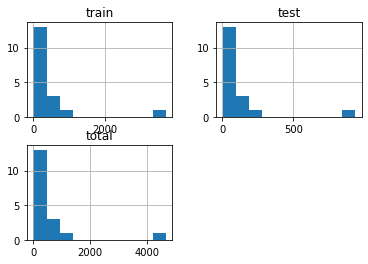

In [15]:
dataset_table.hist()

## visualize point clouds

In [16]:
# vis. one point cloud
import open3d as o3d

try:
    with open(os.path.join(data_root, file_all), 'r') as f:
        file_names = np.array([line.strip() for line in f]) 
except Exception as e:
    raise e
print(file_names)

# a bug possibly due to GPU, https://github.com/isl-org/Open3D/issues/1550
i=np.random.choice(len(file_names), 1)
a_cloud = os.path.join(data_root, str(file_names[i][0]))
pcd = o3d.io.read_point_cloud(a_cloud)
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
['Flange/Flange_3_2.xyz' 'Flange/Flange_38_3.xyz'
 'Flange/Flange_106_3.xyz' ... 'Cross/Cross2_3.xyz' 'Cross/Cross4_1.xyz'
 'Cross/Cross1_1.xyz']
PointCloud with 6135 points.
[[  8.783226 -68.573854   1.800126]
 [  8.780142 -68.57725    1.801495]
 [  8.74242  -68.605087   1.801605]
 ...
 [  8.783993 -68.690277   1.84814 ]
 [  8.784627 -68.6898     1.845608]
 [  8.789719 -68.691465   1.847011]]
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [17]:
import matplotlib
%matplotlib inline

# plot using PyntCloud, based on https://github.com/daavoo/pyntcloud/blob/master/examples/%5Bvisualization%5D%20PyntCloud.ipynb
i=np.random.choice(len(file_names), 1)
a_cloud = os.path.join(data_root, str(file_names[i][0]))
from pyntcloud import PyntCloud

cloud = PyntCloud.from_file(a_cloud,
                            sep=" ",
                            header=0,
                            names=["x","y","z"])
cloud

PyntCloud
10351 points with 0 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 13.386032598782725, -20.83079837213796, 0.6769877818568254
Other attributes:

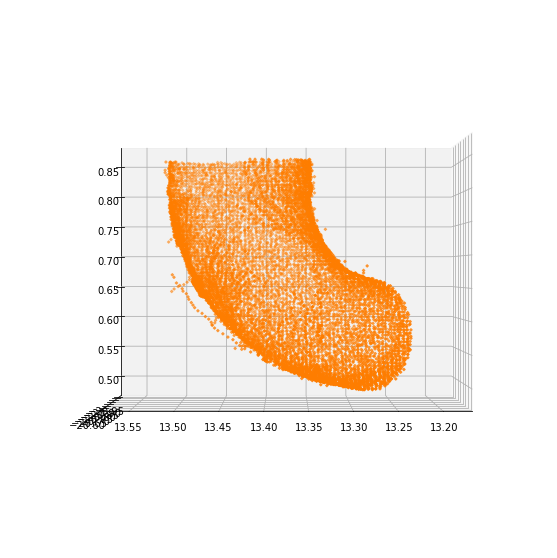

In [18]:
scene = cloud.plot(return_scene=True)

In [19]:
# plot using matplotlib
np.random.seed(123)
i=np.random.choice(len(file_names), 1)
a_cloud_name = os.path.join(data_root, str(file_names[i][0]))
with open(a_cloud_name, 'r') as f:
    cloud = np.array([[float(x) for x in line.strip().split()] for line in f]) # Stack all data
print(cloud.shape)

(25921, 3)


In [20]:
cloud[0]

array([ 61.00395, -76.81522,   4.1812 ])

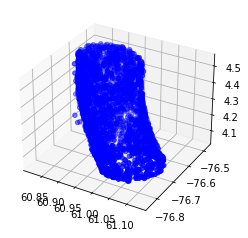

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
inds=np.random.choice(cloud.shape[0], int(cloud.shape[0]*0.1), replace=False)
cloud_sample = cloud[inds,:]
# ax.scatter(cloud, c='r', marker='o')
# plot the orignal cloud
# ax.scatter(cloud[:,0], cloud[:,1], cloud[:,2], c='r', marker='o')
# plot a sub-sampled cloud
ax.scatter(cloud_sample[:,0], cloud_sample[:,1], cloud_sample[:,2], c='b', marker='o')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
plt.show()

In [22]:
def pc_normalize(pc):
    # Center and rescale point for 1m radius
    pmin = np.min(pc, axis=0)
    pmax = np.max(pc, axis=0)
    pc -= (pmin + pmax) / 2
    scale = np.max(np.linalg.norm(pc, axis=1))
    pc *= 1.0 / scale

    return pc

In [23]:
def plot_point_clouds_per_category(cloud_files_per_category, num_point_clouds=4, sampling_ratio=0.5):
    
    fig = plt.figure() 
    assert len(cloud_files_per_category)>= num_point_clouds
    inds_shape=np.random.choice(len(cloud_files_per_category), num_point_clouds, replace=False)
    num_per_col=int(np.sqrt(num_point_clouds))
    for i in range(num_per_col):
        for j in range(num_per_col):
            cloud_name=cloud_files_per_category[inds_shape[j]]
            # print(cloud_name)
            with open(cloud_name, 'r') as f:
                cloud = np.array([[float(x) for x in line.strip().split()] for line in f]) # Stack all data
            # print(cloud.shape) 
            cloud=pc_normalize(cloud)
            
            # why not show in one line?
            # no need in 3d mode as not friendly to vis. projection='3d'
            ax=plt.subplot2grid((num_per_col,num_per_col), (i,j))
            
            inds=np.random.choice(cloud.shape[0], int(cloud.shape[0]*sampling_ratio), replace=False)
            cloud_sample = cloud[inds,:]
            # plot a sub-sampled cloud
            ax.scatter(cloud_sample[:,0], cloud_sample[:,1], cloud_sample[:,2], c='b', marker='o')
            # ax.set_xlabel('X Label')
            # ax.set_ylabel('Y Label')
            # ax.set_zlabel('Z Label')
            plt.show()

BlindFlange: has 222 point clouds, typical ones are:


/home/user/miniconda3/envs/closerlook/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


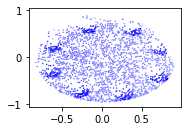

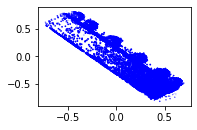

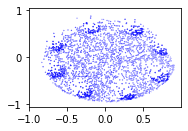

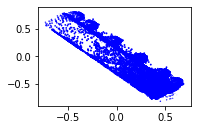

Cross: has 15 point clouds, typical ones are:


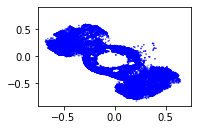

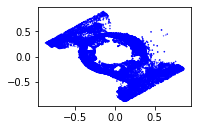

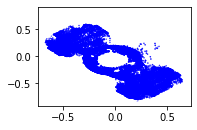

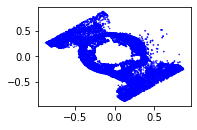

Elbow 90: has 1158 point clouds, typical ones are:


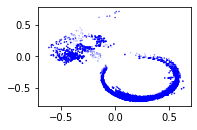

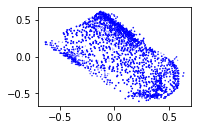

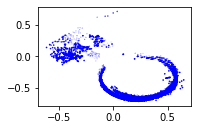

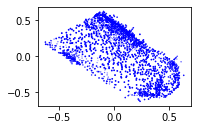

Elbow non 90: has 183 point clouds, typical ones are:


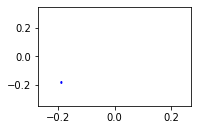

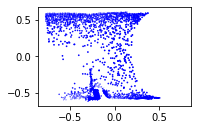

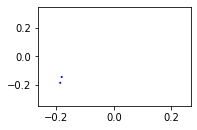

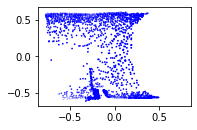

Flange: has 513 point clouds, typical ones are:


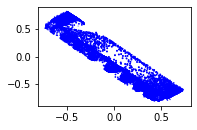

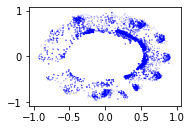

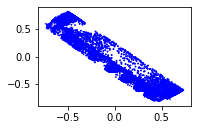

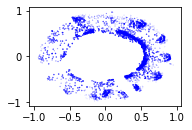

Flange WN: has 873 point clouds, typical ones are:


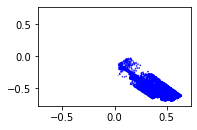

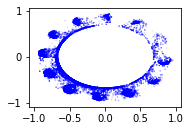

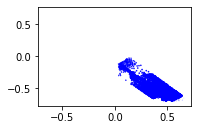

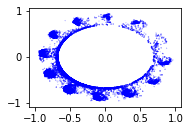

Olet: has 18 point clouds, typical ones are:


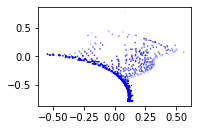

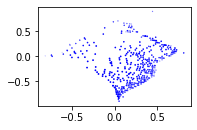

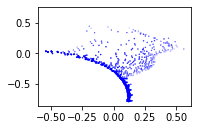

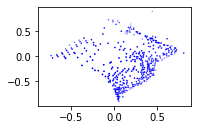

OrificeFlange: has 9 point clouds, typical ones are:


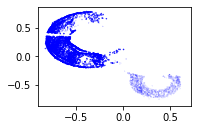

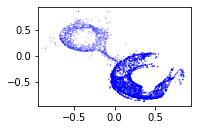

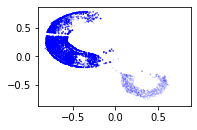

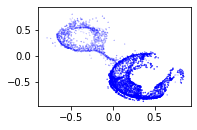

Pipe: has 72 point clouds, typical ones are:


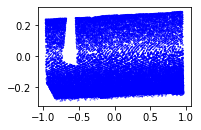

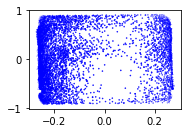

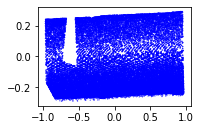

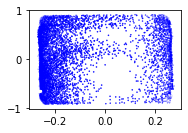

Reducer CONC: has 210 point clouds, typical ones are:


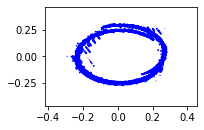

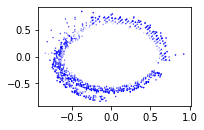

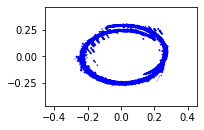

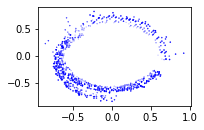

Reducer ECC: has 72 point clouds, typical ones are:


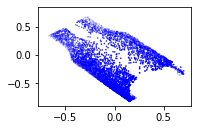

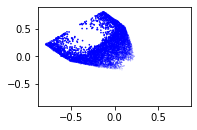

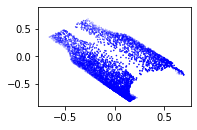

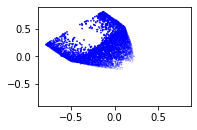

Reducer Insert: has 18 point clouds, typical ones are:


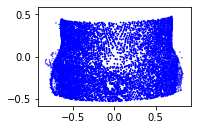

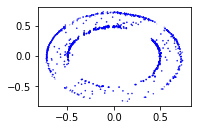

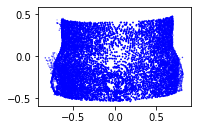

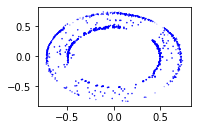

Safety Valve: has 15 point clouds, typical ones are:


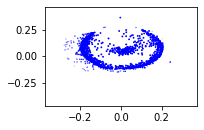

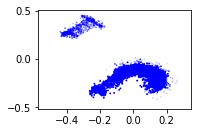

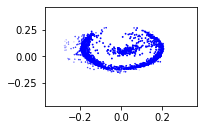

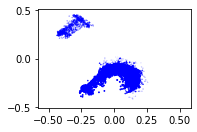

Strainer: has 75 point clouds, typical ones are:


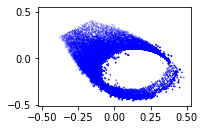

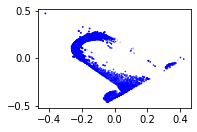

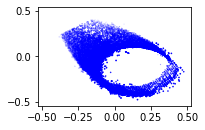

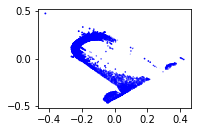

Tee: has 342 point clouds, typical ones are:


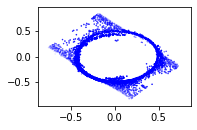

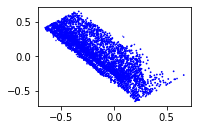

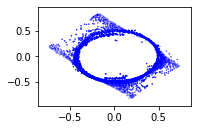

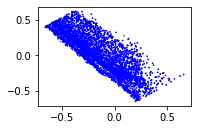

Tee RED: has 165 point clouds, typical ones are:


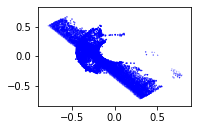

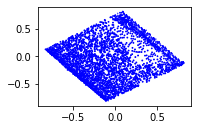

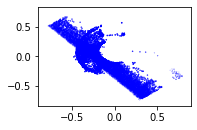

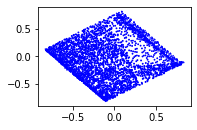

Valve: has 684 point clouds, typical ones are:


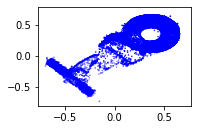

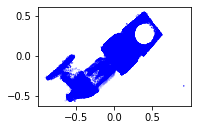

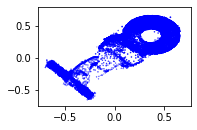

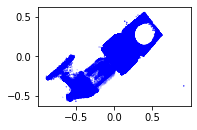

In [24]:
# plot 5 clouds for each category
# iterate over files
for shape_name in shape_names:
    cloud_files=glob.glob(os.path.join(data_root,shape_name,"*.xyz"))
    print(f"{shape_name}: has {len(cloud_files)} point clouds, typical ones are:")
    plot_point_clouds_per_category(cloud_files)
    # break
    # plot 5 random files in one figure

In [27]:
shape_names_file=os.path.join(data_root,'shape_names.txt')
with open(shape_names_file, 'r') as f:
    shape_names=[line.strip() for line in f if line.strip()]
print(shape_names)

label_to_names={}
for (i,item) in enumerate(shape_names):
    label_to_names[i]=item
print(label_to_names)

['BlindFlange', 'Cross', 'Elbow 90', 'Elbow non 90', 'Flange', 'Flange WN', 'Olet', 'OrificeFlange', 'Pipe', 'Reducer CONC', 'Reducer ECC', 'Reducer Insert', 'Safety Valve', 'Strainer', 'Tee', 'Tee RED', 'Valve']
{0: 'BlindFlange', 1: 'Cross', 2: 'Elbow 90', 3: 'Elbow non 90', 4: 'Flange', 5: 'Flange WN', 6: 'Olet', 7: 'OrificeFlange', 8: 'Pipe', 9: 'Reducer CONC', 10: 'Reducer ECC', 11: 'Reducer Insert', 12: 'Safety Valve', 13: 'Strainer', 14: 'Tee', 15: 'Tee RED', 16: 'Valve'}


In [37]:
# the vis code is borrowed from https://keras.io/examples/vision/pointnet/#visualize-predictions
def plot_point_clouds_per_category_3d(cloud_files_per_category, shape_name, num_point_clouds=8, sampling_ratio=0.5):
    fig = plt.figure(figsize=(15, 10))
    assert len(cloud_files_per_category)>= num_point_clouds
    inds_shape=np.random.choice(len(cloud_files_per_category), num_point_clouds, replace=False)
    for i in range(num_point_clouds):
        cloud_name=cloud_files_per_category[inds_shape[i]]
        print(cloud_name)
        with open(cloud_name, 'r') as f:
            points = np.array([[float(x) for x in line.strip().split()] for line in f]) # Stack all data
            # print(cloud.shape) 
            points=pc_normalize(points)
            ax = fig.add_subplot(2, 4, i + 1, projection="3d")
            # plot raw pc
            #ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2], c='b', marker='o')     
            # plot a sub-sampled cloud
            inds=np.random.choice(points.shape[0], int(points.shape[0]*sampling_ratio), replace=False)
            points_sample = points[inds,:]
            ax.scatter(points_sample[:,0], points_sample[:,1], points_sample[:,2], )
            ax.set_title(f'label: {shape_name}')
            ax.set_axis_off()
    plt.show()

BlindFlange: has 222 point clouds, typical ones are:
./PipeWork-original/BlindFlange/BlindFlange_52_2.xyz
./PipeWork-original/BlindFlange/BlindFlange_12_2.xyz
./PipeWork-original/BlindFlange/BlindFlange_62_3.xyz
./PipeWork-original/BlindFlange/BlindFlange_59_2.xyz
./PipeWork-original/BlindFlange/BlindFlange_8_2.xyz
./PipeWork-original/BlindFlange/BlindFlange_58_3.xyz
./PipeWork-original/BlindFlange/BlindFlange_4_2.xyz
./PipeWork-original/BlindFlange/BlindFlange_26_2.xyz


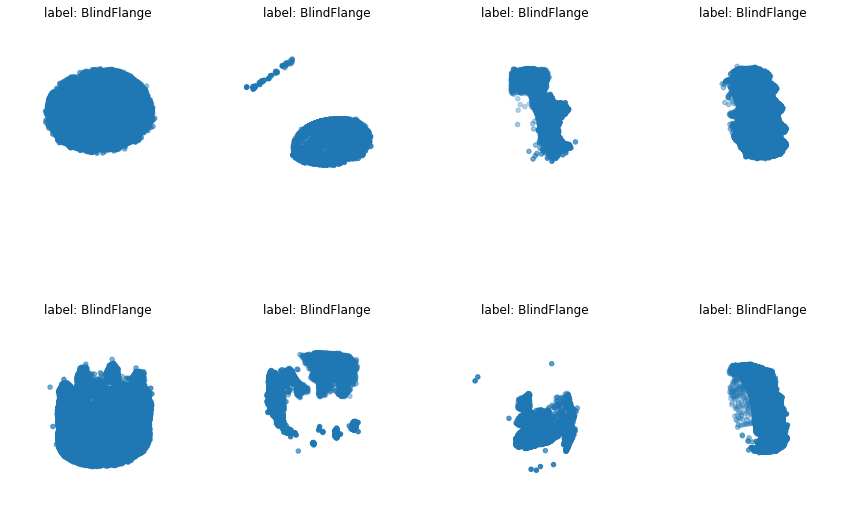



Cross: has 15 point clouds, typical ones are:
./PipeWork-original/Cross/Cross3_3.xyz
./PipeWork-original/Cross/Cross5_1.xyz
./PipeWork-original/Cross/Cross5_3.xyz
./PipeWork-original/Cross/Cross2_3.xyz
./PipeWork-original/Cross/Cross2_2.xyz
./PipeWork-original/Cross/Cross2_1.xyz
./PipeWork-original/Cross/Cross4_1.xyz
./PipeWork-original/Cross/Cross1_1.xyz


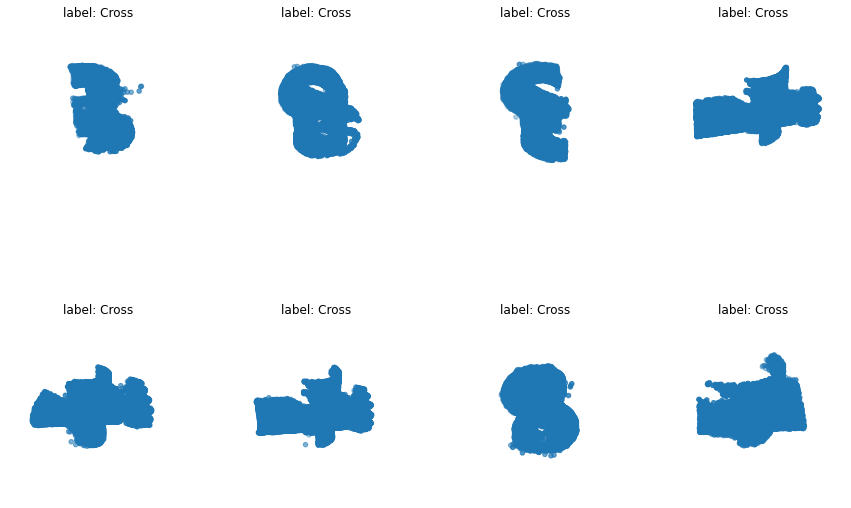



Elbow 90: has 1158 point clouds, typical ones are:
./PipeWork-original/Elbow 90/Elbow 90_273_2.xyz
./PipeWork-original/Elbow 90/Elbow 90_330_1.xyz
./PipeWork-original/Elbow 90/Elbow 90_106_3.xyz
./PipeWork-original/Elbow 90/Elbow 90_364_1.xyz
./PipeWork-original/Elbow 90/Elbow 90_83_1.xyz
./PipeWork-original/Elbow 90/Elbow 90_274_2.xyz
./PipeWork-original/Elbow 90/Elbow 90_25_3.xyz
./PipeWork-original/Elbow 90/Elbow 90_377_2.xyz


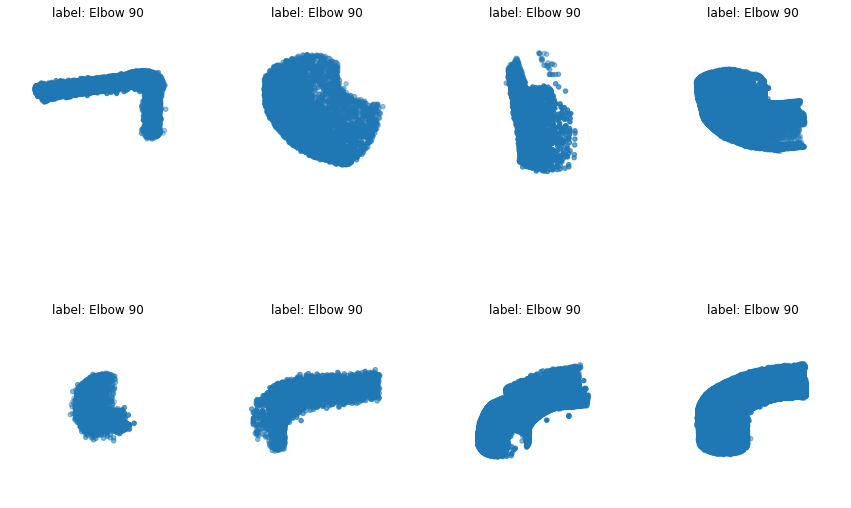



Elbow non 90: has 183 point clouds, typical ones are:
./PipeWork-original/Elbow non 90/Elbow non 90_21_1.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_15_2.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_2_1.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_33_3.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_45_1.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_32_3.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_32_2.xyz
./PipeWork-original/Elbow non 90/Elbow non 90_33_1.xyz


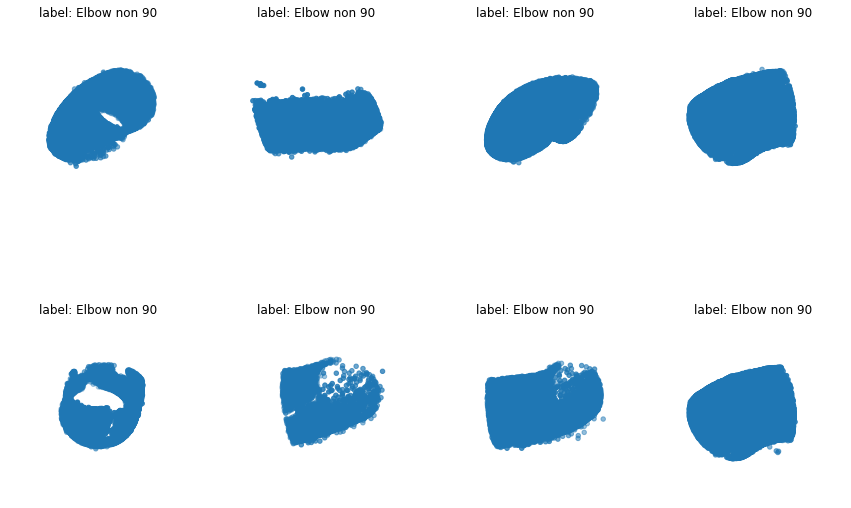



Flange: has 513 point clouds, typical ones are:
./PipeWork-original/Flange/Flange_62_1.xyz
./PipeWork-original/Flange/Flange_76_3.xyz
./PipeWork-original/Flange/Flange_114_3.xyz
./PipeWork-original/Flange/Flange_131_2.xyz
./PipeWork-original/Flange/Flange_79_1.xyz
./PipeWork-original/Flange/Flange_160_2.xyz
./PipeWork-original/Flange/Flange_151_2.xyz
./PipeWork-original/Flange/Flange_111_1.xyz


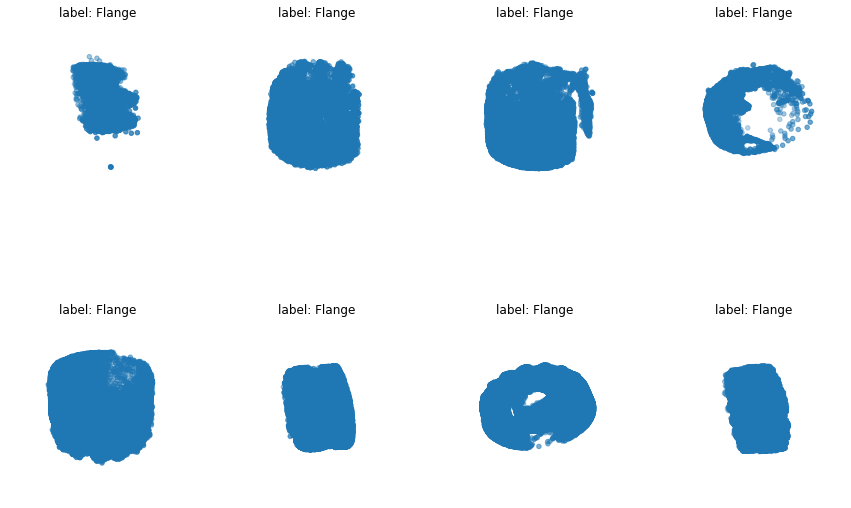



Flange WN: has 873 point clouds, typical ones are:
./PipeWork-original/Flange WN/Flange WN_141_2.xyz
./PipeWork-original/Flange WN/Flange WN_177_1.xyz
./PipeWork-original/Flange WN/Flange WN_187_2.xyz
./PipeWork-original/Flange WN/Flange WN_4_1.xyz
./PipeWork-original/Flange WN/Flange WN_273_1.xyz
./PipeWork-original/Flange WN/Flange WN_98_3.xyz
./PipeWork-original/Flange WN/Flange WN_4_3.xyz
./PipeWork-original/Flange WN/Flange WN_188_2.xyz


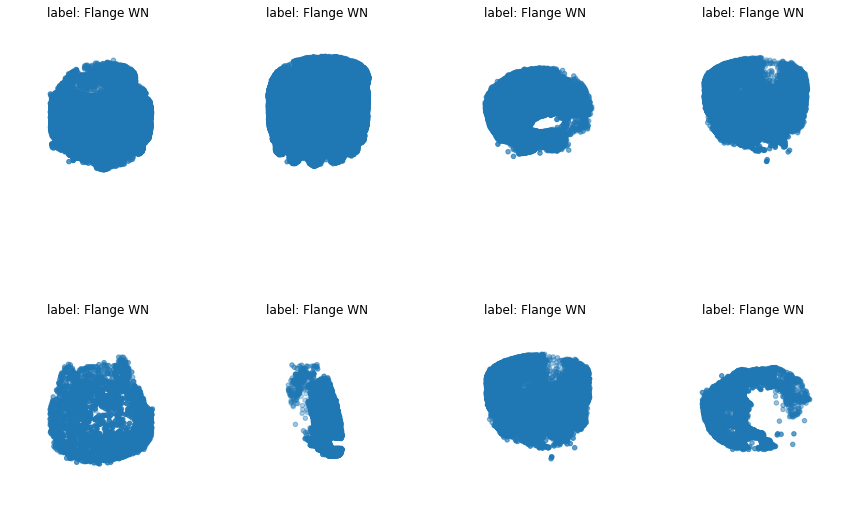



Olet: has 18 point clouds, typical ones are:
./PipeWork-original/Olet/Olet_1_2.xyz
./PipeWork-original/Olet/Olet_5_1.xyz
./PipeWork-original/Olet/Olet_6_2.xyz
./PipeWork-original/Olet/Olet_2_1.xyz
./PipeWork-original/Olet/Olet_5_3.xyz
./PipeWork-original/Olet/Olet_3_2.xyz
./PipeWork-original/Olet/Olet_1_3.xyz
./PipeWork-original/Olet/Olet_6_3.xyz


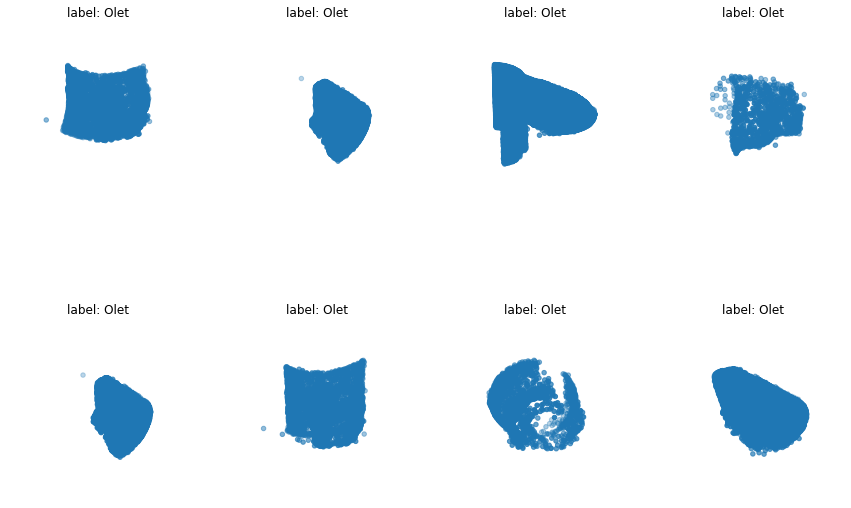



OrificeFlange: has 9 point clouds, typical ones are:
./PipeWork-original/OrificeFlange/OrificeFlange_3_1.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_1_2.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_2_2.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_2_1.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_3_3.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_1_3.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_2_3.xyz
./PipeWork-original/OrificeFlange/OrificeFlange_3_2.xyz


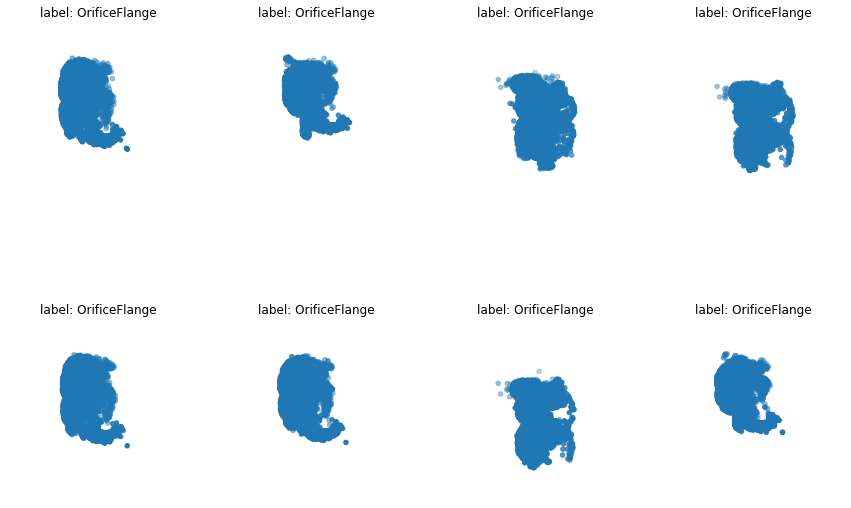



Pipe: has 72 point clouds, typical ones are:
./PipeWork-original/Pipe/Pipe_24_1.xyz
./PipeWork-original/Pipe/Pipe_11_2.xyz
./PipeWork-original/Pipe/Pipe_1_1.xyz
./PipeWork-original/Pipe/Pipe_6_2.xyz
./PipeWork-original/Pipe/Pipe_23_2.xyz
./PipeWork-original/Pipe/Pipe_21_2.xyz
./PipeWork-original/Pipe/Pipe_11_3.xyz
./PipeWork-original/Pipe/Pipe_3_3.xyz


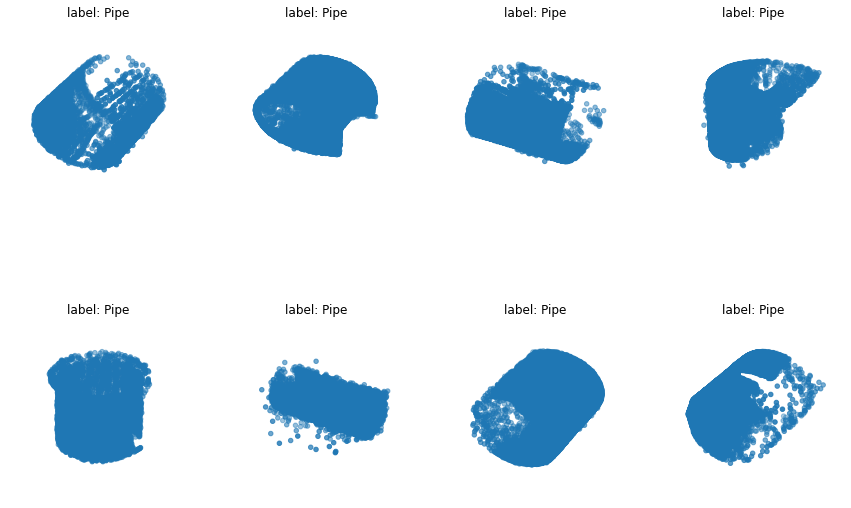



Reducer CONC: has 210 point clouds, typical ones are:
./PipeWork-original/Reducer CONC/Reducer CONC_3_3.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_68_2.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_45_1.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_52_3.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_23_1.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_26_2.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_32_1.xyz
./PipeWork-original/Reducer CONC/Reducer CONC_11_1.xyz


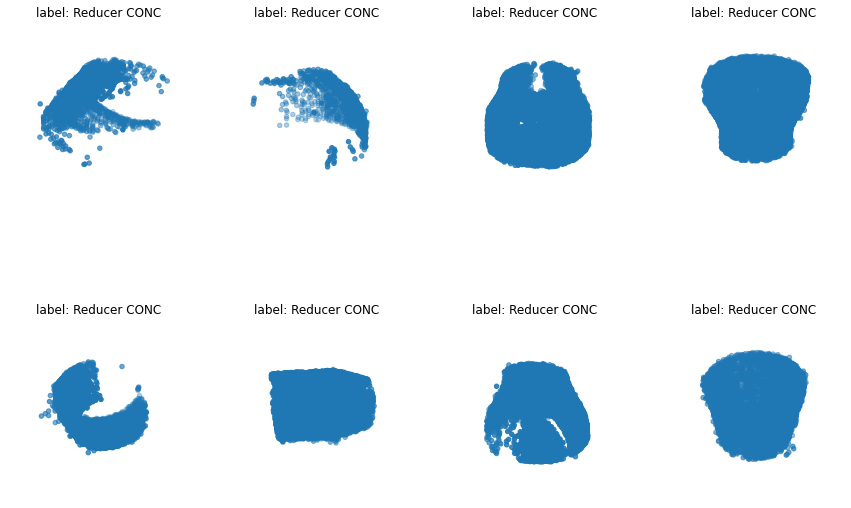



Reducer ECC: has 72 point clouds, typical ones are:
./PipeWork-original/Reducer ECC/Reducer ECC_26_1.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_16_2.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_24_2.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_5_2.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_19_3.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_27_1.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_16_3.xyz
./PipeWork-original/Reducer ECC/Reducer ECC_2_2.xyz


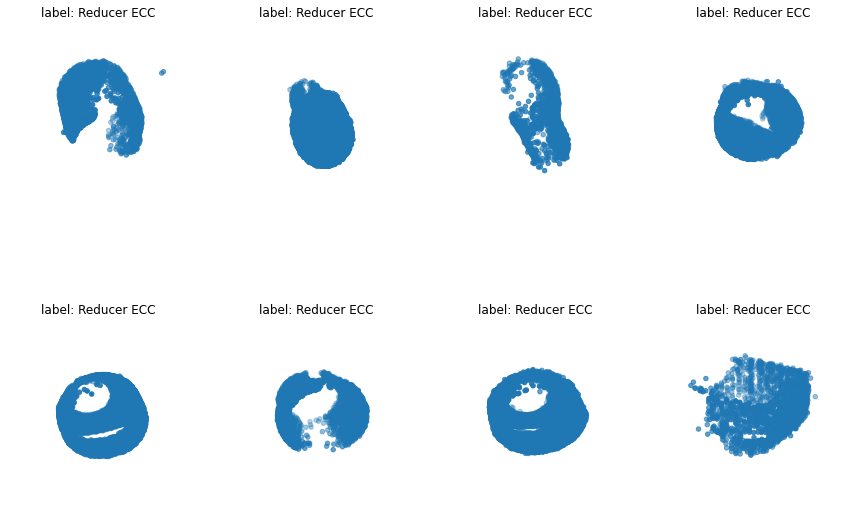



Reducer Insert: has 18 point clouds, typical ones are:
./PipeWork-original/Reducer Insert/Reducer Insert_1_2.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_5_1.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_3_1.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_3_2.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_6_3.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_6_1.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_4_1.xyz
./PipeWork-original/Reducer Insert/Reducer Insert_2_1.xyz


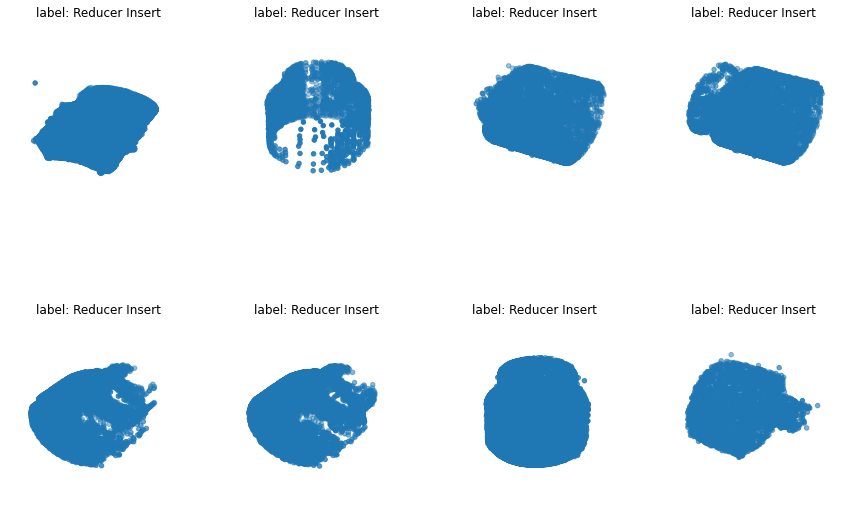



Safety Valve: has 15 point clouds, typical ones are:
./PipeWork-original/Safety Valve/Safety Valve_3_2.xyz
./PipeWork-original/Safety Valve/Safety Valve_4_2.xyz
./PipeWork-original/Safety Valve/Safety Valve_2_3.xyz
./PipeWork-original/Safety Valve/Safety Valve_4_1.xyz
./PipeWork-original/Safety Valve/Safety Valve_1_2.xyz
./PipeWork-original/Safety Valve/Safety Valve_2_1.xyz
./PipeWork-original/Safety Valve/Safety Valve_1_1.xyz
./PipeWork-original/Safety Valve/Safety Valve_4_3.xyz


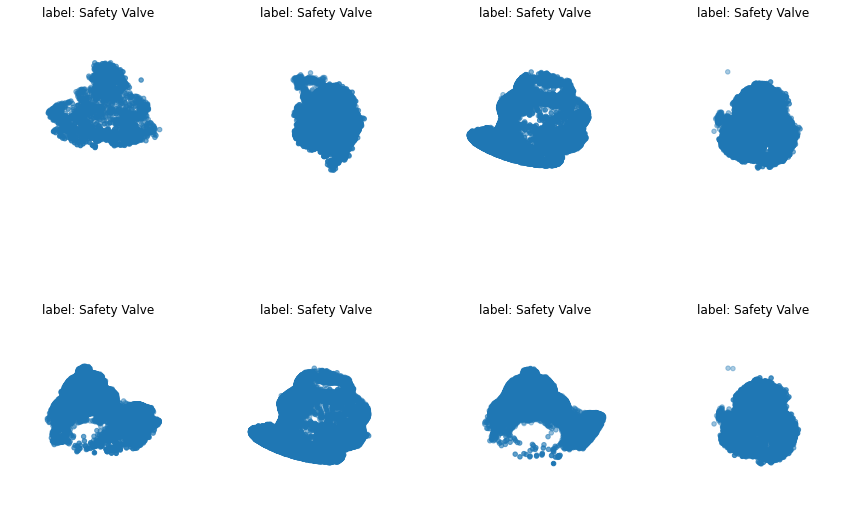



Strainer: has 75 point clouds, typical ones are:
./PipeWork-original/Strainer/Strainer_21_2.xyz
./PipeWork-original/Strainer/Strainer_16_1.xyz
./PipeWork-original/Strainer/Strainer_25_2.xyz
./PipeWork-original/Strainer/Strainer_14_1.xyz
./PipeWork-original/Strainer/Strainer_11_3.xyz
./PipeWork-original/Strainer/Strainer_1_3.xyz
./PipeWork-original/Strainer/Strainer_3_1.xyz
./PipeWork-original/Strainer/Strainer_23_2.xyz


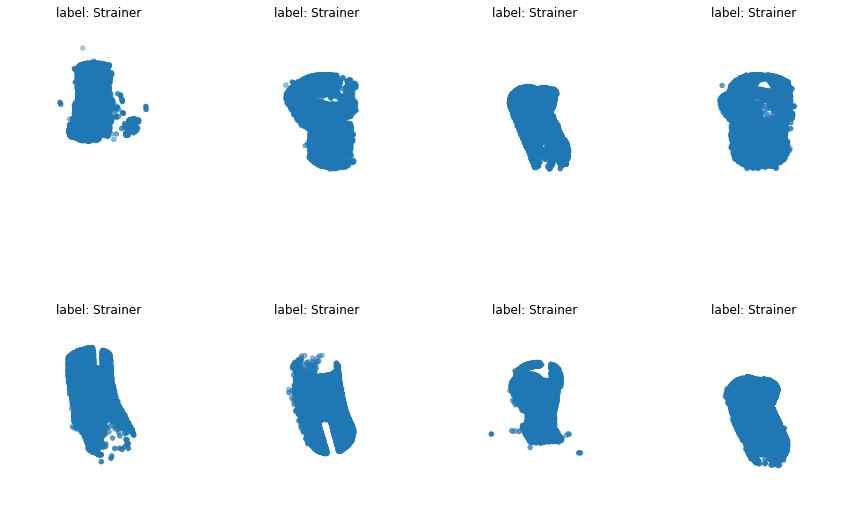



Tee: has 342 point clouds, typical ones are:
./PipeWork-original/Tee/Tee_95_2.xyz
./PipeWork-original/Tee/Tee_57_3.xyz
./PipeWork-original/Tee/Tee_50_3.xyz
./PipeWork-original/Tee/Tee_79_1.xyz
./PipeWork-original/Tee/Tee_94_2.xyz
./PipeWork-original/Tee/Tee_51_1.xyz
./PipeWork-original/Tee/Tee_40_2.xyz
./PipeWork-original/Tee/Tee_71_1.xyz


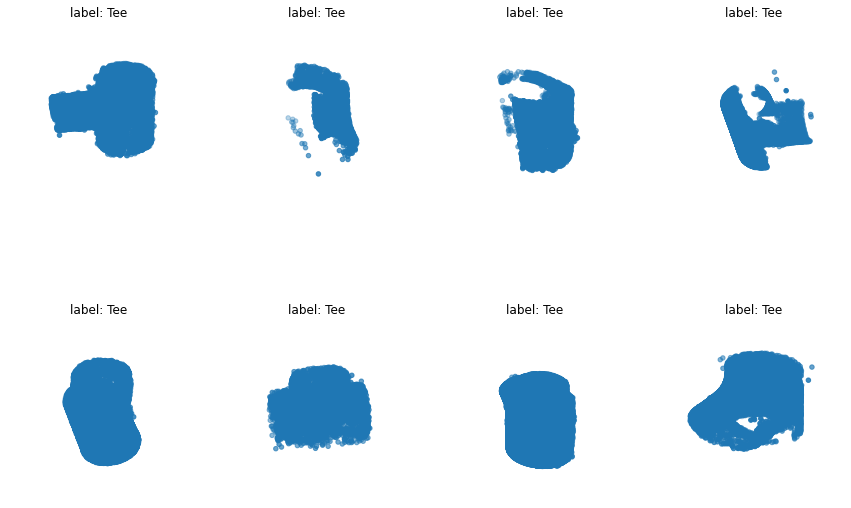



Tee RED: has 165 point clouds, typical ones are:
./PipeWork-original/Tee RED/Tee RED_15_1.xyz
./PipeWork-original/Tee RED/Tee RED_42_3.xyz
./PipeWork-original/Tee RED/Tee RED_8_1.xyz
./PipeWork-original/Tee RED/Tee RED_29_1.xyz
./PipeWork-original/Tee RED/Tee RED_55_1.xyz
./PipeWork-original/Tee RED/Tee RED_51_2.xyz
./PipeWork-original/Tee RED/Tee RED_35_3.xyz
./PipeWork-original/Tee RED/Tee RED_2_1.xyz


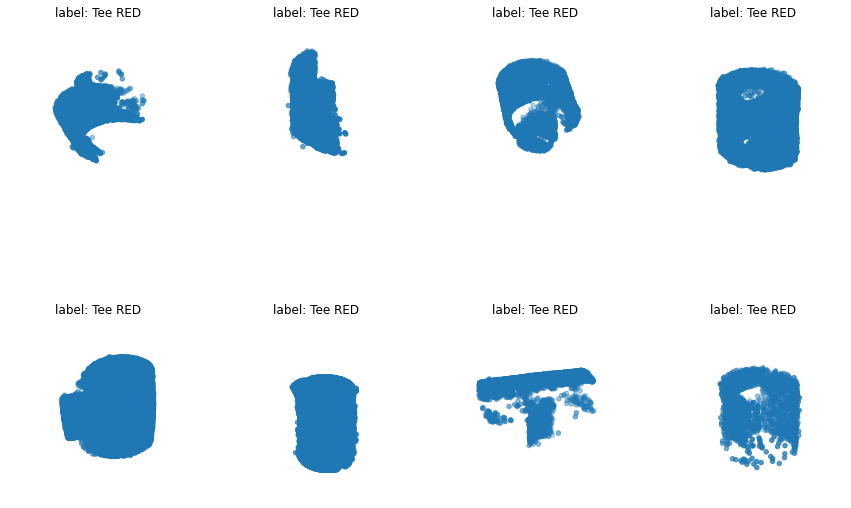



Valve: has 684 point clouds, typical ones are:
./PipeWork-original/Valve/Valve_122_3.xyz
./PipeWork-original/Valve/Valve_112_2.xyz
./PipeWork-original/Valve/Valve_191_3.xyz
./PipeWork-original/Valve/Valve_216_1.xyz
./PipeWork-original/Valve/Valve_131_1.xyz
./PipeWork-original/Valve/Valve_107_3.xyz
./PipeWork-original/Valve/Valve_164_1.xyz
./PipeWork-original/Valve/Valve_152_2.xyz


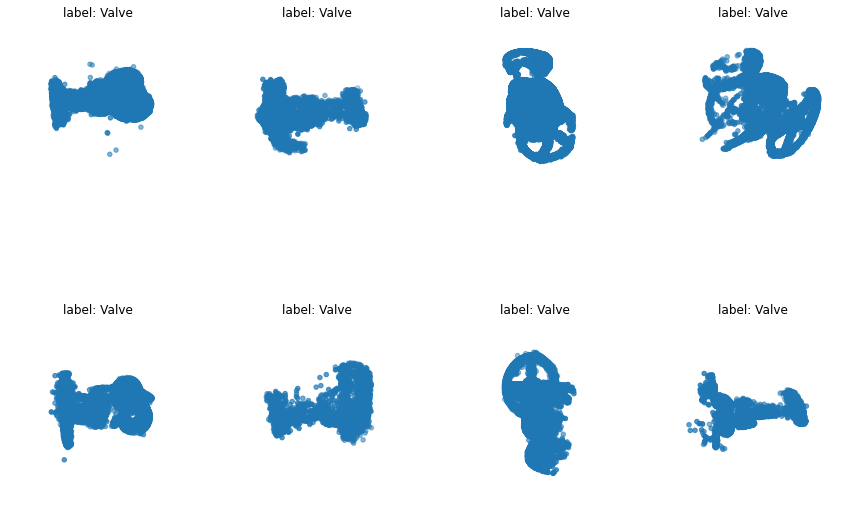

In [38]:
for shape_name in shape_names:
    cloud_files=glob.glob(os.path.join(data_root,shape_name,"*.xyz"))
    # print(cloud_files)
    print(f"{shape_name}: has {len(cloud_files)} point clouds, typical ones are:")
    plot_point_clouds_per_category_3d(cloud_files,shape_name)
    print('\n')

## Create a normalized and resampled PipeWork dataset following ModelNet40's modelnet40_normal_resampled
- In ModelNet40's modelnet40_normal_resampled dataset, all instances only have 10,000 points
- Following this practice, we also normalize and resample each instance.